IMPORTANT: This notebook is designed to be able to reproduce the O'Kane et al. (2022) results as closely as possible. This means some features of modern PyBaMM that save considerable computational resources are not used. Learning how to use these will be my next priority.

In [1]:
#import os
import matplotlib.pyplot as plt
import numpy as np
import pybamm
import pandas as pd
import timeit
start = timeit.default_timer()
#os.chdir(pybamm.__path__[0]+'/..')
# pybamm.set_logging_level("INFO")

In [2]:
model = pybamm.lithium_ion.DFN(
    options={
        "particle": "Fickian diffusion", 
        "particle mechanics": "swelling only",
        "loss of active material": "stress-driven",
    }
)

In [3]:
chemistry = pybamm.parameter_sets.OKane2022
param = pybamm.ParameterValues(chemistry=chemistry)
param.update({"Upper voltage cut-off [V]": 4.21})
param.update({"Lower voltage cut-off [V]": 2.49})
param.update({"Negative electrode LAM constant proportional term [s-1]": 0.02/3600})

In [4]:
total_cycles=1000
exp = pybamm.Experiment(
    ["Hold at 4.2V until C/100", "Rest for 4 hours (5 minute period)", "Discharge at C/10 until 2.5V (5 minute period)", 
    "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"] + [(
    "Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)",
    ),] * total_cycles + ["Discharge at C/10 until 2.5V (5 minute period)"]
)

In [5]:
var_pts = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 30,  # positive particle
}

In [6]:
sim1 = pybamm.Simulation(
    model, 
    experiment=exp,
    parameter_values=param,
    solver=pybamm.CasadiSolver(),
    var_pts=var_pts,
)
solution1 = sim1.solve(calc_esoh=False)

stop = timeit.default_timer()
print('running time: ' + str(stop - start) +'s')

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linese

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linese

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linese

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calcula

The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.
The linesearch algorit

running time: 9937.833006500005s


In [7]:
path = '/mnt/c/Users/sokane/pybamm_data/OKane2022_verification/'

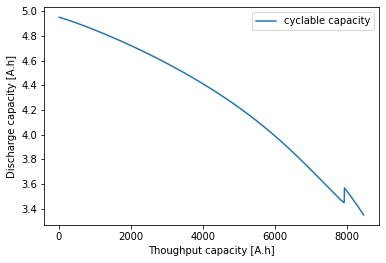

In [8]:
Q_previous = []
Q0 = solution1.cycles[0]["Discharge capacity [A.h]"].entries
Q0_delta = np.absolute(Q0[-1]-Q0[0])
Q2 = solution1.cycles[2]["Discharge capacity [A.h]"].entries
Q2_delta = np.absolute(Q2[-1]-Q2[0])
Q3 = solution1.cycles[3]["Discharge capacity [A.h]"].entries
Q3_delta = np.absolute(Q3[-1]-Q3[0])
Q4 = solution1.cycles[4]["Discharge capacity [A.h]"].entries
Q4_delta = np.absolute(Q4[-1]-Q4[0])
Q_previous.append(Q0_delta+Q2_delta+Q3_delta+Q4_delta)
Q_throughput = []
Qdis_cycles = []
cs_neg_avg = []
cs_neg_sep = []
cs_neg_CC = []
cs_pos_avg = []
cs_pos_sep = []
cs_pos_CC = []
U_neg_avg = []
U_neg_sep = []
U_neg_CC = []
U_pos_avg = []
U_pos_sep = []
U_pos_CC = []
AM_neg_avg = []
AM_neg_sep = []
AM_neg_CC = []
AM_pos_avg = []
AM_pos_sep = []
AM_pos_CC = []
for i in range(total_cycles):
    Qdis = solution1.cycles[i+5].steps[0]["Discharge capacity [A.h]"].entries
    Qdis_delta = Qdis[-1] - Qdis[0]
    Qdis_cycles.append(Qdis_delta)
    Q_throughput.append(Q_previous[i]+Qdis_delta)
    Q_CC = solution1.cycles[i+5].steps[1]["Discharge capacity [A.h]"].entries
    Q_CC_delta = np.absolute(Q_CC[-1]-Q_CC[0])
    Q_CV = solution1.cycles[i+5].steps[2]["Discharge capacity [A.h]"].entries
    Q_CV_delta = np.absolute(Q_CV[-1]-Q_CV[0])
    Q_previous.append(Q_previous[i]+Qdis_delta+Q_CC_delta+Q_CV_delta)
    cs_neg_avg_temp = solution1.cycles[i+5].steps[0]["X-averaged negative particle surface concentration"].entries
    cs_neg_avg.append(cs_neg_avg_temp[-1])
    cs_neg_sep_temp = solution1.cycles[i+5].steps[0]["Negative particle surface concentration"].entries[-1,-1]
    cs_neg_sep.append(cs_neg_sep_temp)
    cs_neg_CC_temp = solution1.cycles[i+5].steps[0]["Negative particle surface concentration"].entries[0,-1]
    cs_neg_CC.append(cs_neg_CC_temp)
    cs_pos_avg_temp = solution1.cycles[i+5].steps[0]["X-averaged positive particle surface concentration"].entries
    cs_pos_avg.append(cs_pos_avg_temp[-1])
    cs_pos_sep_temp = solution1.cycles[i+5].steps[0]["Positive particle surface concentration"].entries[0,-1]
    cs_pos_sep.append(cs_pos_sep_temp)
    cs_pos_CC_temp = solution1.cycles[i+5].steps[0]["Positive particle surface concentration"].entries[-1,-1]
    cs_pos_CC.append(cs_pos_CC_temp)
    U_neg_avg_temp = solution1.cycles[i+5].steps[0]["X-averaged negative electrode open circuit potential [V]"].entries
    U_neg_avg.append(U_neg_avg_temp[-1])
    U_neg_sep_temp = solution1.cycles[i+5].steps[0]["Negative electrode open circuit potential [V]"].entries[-1,-1]
    U_neg_sep.append(U_neg_sep_temp)
    U_neg_CC_temp = solution1.cycles[i+5].steps[0]["Negative electrode open circuit potential [V]"].entries[0,-1]
    U_neg_CC.append(U_neg_CC_temp)
    U_pos_avg_temp = solution1.cycles[i+5].steps[0]["X-averaged positive electrode open circuit potential [V]"].entries
    U_pos_avg.append(U_pos_avg_temp[-1])
    U_pos_sep_temp = solution1.cycles[i+5].steps[0]["Positive electrode open circuit potential [V]"].entries[0,-1]
    U_pos_sep.append(U_pos_sep_temp)
    U_pos_CC_temp = solution1.cycles[i+5].steps[0]["Positive electrode open circuit potential [V]"].entries[-1,-1]
    U_pos_CC.append(U_pos_CC_temp)
    AM_temp = solution1.cycles[i+5].steps[0]["X-averaged negative electrode active material volume fraction"].entries
    AM_neg_avg.append(AM_temp[-1])
    AM_sep_temp = solution1.cycles[i+5].steps[0]["Negative electrode active material volume fraction"].entries[-1,-1]
    AM_neg_sep.append(AM_sep_temp)
    AM_CC_temp = solution1.cycles[i+5].steps[0]["Negative electrode active material volume fraction"].entries[0,-1]
    AM_neg_CC.append(AM_CC_temp)
    AM_temp = solution1.cycles[i+5].steps[0]["X-averaged positive electrode active material volume fraction"].entries
    AM_pos_avg.append(AM_temp[-1])
    AM_sep_temp = solution1.cycles[i+5].steps[0]["Positive electrode active material volume fraction"].entries[0,-1]
    AM_pos_sep.append(AM_sep_temp)
    AM_CC_temp = solution1.cycles[i+5].steps[0]["Positive electrode active material volume fraction"].entries[-1,-1]
    AM_pos_CC.append(AM_CC_temp)
plt.figure()
plt.plot(Q_throughput, Qdis_cycles, label='cyclable capacity')
plt.xlabel("Thoughput capacity [A.h]")
plt.ylabel("Discharge capacity [A.h]")
plt.legend()
filename = path+'LAM_n20p1.pdf'
plt.savefig(filename,bbox_inches='tight')
plt.show()
M_cycles = np.array([Q_throughput,Qdis_cycles,
                     cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                     U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                     AM_neg_avg,AM_neg_sep,AM_neg_CC,AM_pos_avg,AM_pos_sep,AM_pos_CC,
    ])
filename_cycles = path+'LAM_n20p1_cycles.txt'
np.savetxt(filename_cycles,M_cycles,delimiter=",")

In [9]:
Qdis_zero = solution1.cycles[2]["Discharge capacity [A.h]"].entries
Vdis_zero = solution1.cycles[2]["Terminal voltage [V]"].entries
cs_neg_avg = solution1.cycles[2]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[2]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[2]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[2]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[2]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[2]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[2]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[2]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[2]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[2]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[2]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[2]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[2]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[2]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[2]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[2]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[2]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[2]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[2]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[2]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[2]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[2]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[2]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[2]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[2]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[2]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[2]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[2]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[2]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[2]["Positive electrolyte concentration"].entries[-1,:]
M_zero = np.array([Qdis_zero,Vdis_zero,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_zero = path+'LAM_n20p1_zero.txt'
np.savetxt(filename_zero,M_zero,delimiter=",")
Qdis_first = solution1.cycles[5].steps[0]["Discharge capacity [A.h]"].entries
Vdis_first = solution1.cycles[5].steps[0]["Terminal voltage [V]"].entries
cs_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[5].steps[0]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[5].steps[0]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[5].steps[0]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[5].steps[0]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[5].steps[0]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[5].steps[0]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[5].steps[0]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[5].steps[0]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[5].steps[0]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[5].steps[0]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[5].steps[0]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[5].steps[0]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[5].steps[0]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[5].steps[0]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[5].steps[0]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[5].steps[0]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[5].steps[0]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[5].steps[0]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[5].steps[0]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[5].steps[0]["Positive electrolyte concentration"].entries[-1,:]
M_first = np.array([Qdis_first,Vdis_first,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_first = path+'LAM_n20p1_first.txt'
np.savetxt(filename_first,M_first,delimiter=",")
Qdis_last = solution1.cycles[total_cycles+4].steps[0]["Discharge capacity [A.h]"].entries
Vdis_last = solution1.cycles[total_cycles+4].steps[0]["Terminal voltage [V]"].entries
cs_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte concentration"].entries[-1,:]
M_last = np.array([Qdis_last,Vdis_last,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_last = path+'LAM_n20p1_last.txt'
np.savetxt(filename_last,M_last,delimiter=",")
Qdis_eval = solution1.cycles[total_cycles+5]["Discharge capacity [A.h]"].entries
Vdis_eval = solution1.cycles[total_cycles+5]["Terminal voltage [V]"].entries
cs_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[total_cycles+5]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[total_cycles+5]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[total_cycles+5]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[total_cycles+5]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[total_cycles+5]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[total_cycles+5]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[total_cycles+5]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[total_cycles+5]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[total_cycles+5]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[total_cycles+5]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[total_cycles+5]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[total_cycles+5]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[total_cycles+5]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[total_cycles+5]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[total_cycles+5]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[total_cycles+5]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[total_cycles+5]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[total_cycles+5]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[total_cycles+5]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[total_cycles+5]["Positive electrolyte concentration"].entries[-1,:]
M_eval = np.array([Qdis_eval,Vdis_eval,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_eval = path+'LAM_n20p1_eval.txt'
np.savetxt(filename_eval,M_eval,delimiter=",")

In [ ]:
fig, ax = plt.subplots()
ax.plot(Qdis_zero,Vdis_zero,label="0.1C discharge at start")
ax.plot(Qdis_first,Vdis_first,label="First discharge",linestyle="dashed")
ax.plot(Qdis_last,Vdis_last,label="Last discharge",linestyle="dashdot")
ax.plot(Qdis_eval,Vdis_eval,label="0.1C discharge at end",linestyle="dotted")
ax.set_xlabel("Discharge capacity [A.h]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
filename = path+"FullyCoupled_ZFLE.pdf"
plt.savefig(filename)
plt.show()